In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("aug_train.csv")
df.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


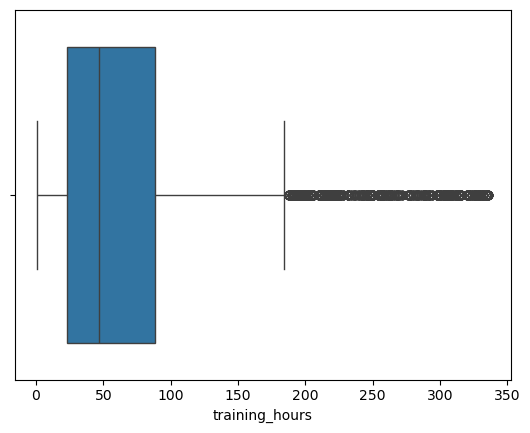

In [5]:
sns.boxplot(x="training_hours",data=df)
plt.show()

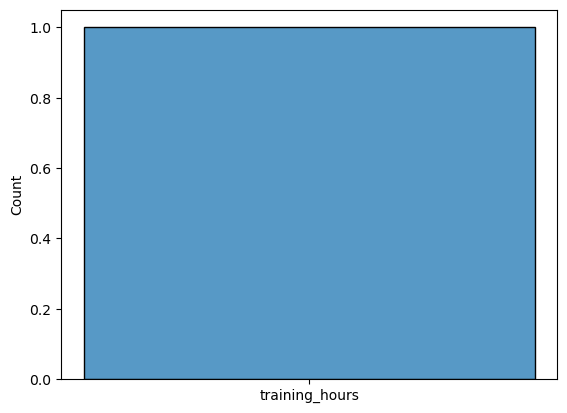

In [23]:
sns.histplot(["training_hours"])
plt.show()

In [25]:
df.shape

(19158, 14)

In [29]:
q1=df["training_hours"].quantile(0.25)

In [31]:
q3=df["training_hours"].quantile(0.75)

In [33]:
q1,q3

(23.0, 88.0)

In [35]:
IQR=q3-q1

In [37]:
min_rang=q1-(1.5*IQR)
max_rang=q3+(1.5*IQR)

In [39]:
min_rang,max_rang

(-74.5, 185.5)

In [41]:
new_data=df[df["training_hours"]<=max_rang]

In [43]:
new_data.shape

(18174, 14)

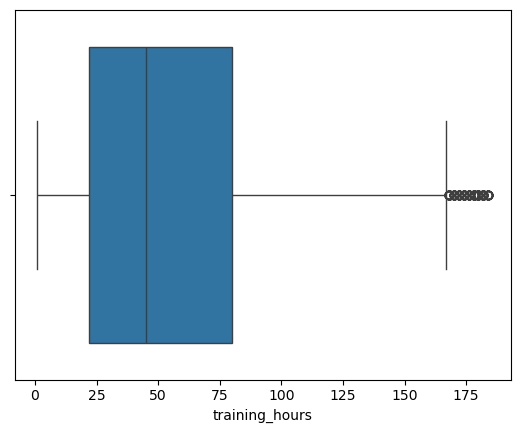

In [45]:
sns.boxplot(x="training_hours",data=new_data)
plt.show()

In [57]:
# normal method to remove outliers
a1=new_data["training_hours"].quantile(0.25)

In [59]:
a3=new_data["training_hours"].quantile(0.75)

In [61]:
a1,a3

(22.0, 80.0)

In [63]:
iqr=a3-a1

In [65]:
min_range=a1-(1.5*iqr)
max_range=a3+(1.5*iqr)

In [67]:
min_range,max_range

(-65.0, 167.0)

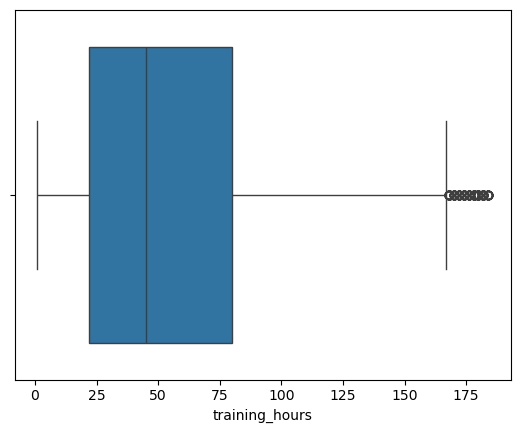

In [71]:
sns.boxplot(x="training_hours",data=new_data)
plt.show()

In [75]:
new_da=new_data[new_data["training_hours"]<max_range]

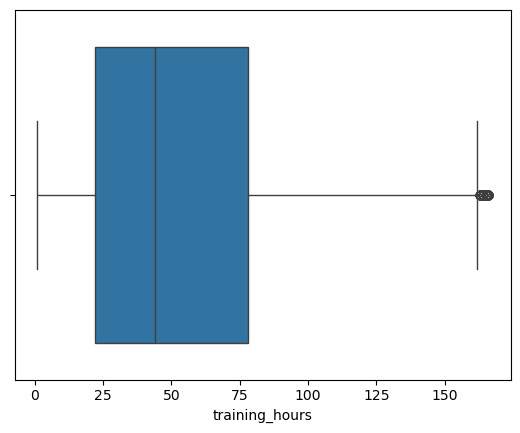

In [77]:
sns.boxplot(x="training_hours",data=new_da)
plt.show()

In [81]:
mini=df["enrollee_id"].mean()-(3*df["enrollee_id"].std())

In [79]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [83]:
maxe=df["enrollee_id"].mean()+(3*df["enrollee_id"].std())

In [85]:
mini,maxe

(-11973.519597132206, 45724.23595583353)

In [89]:
sc=df[df["enrollee_id"]<=maxe]

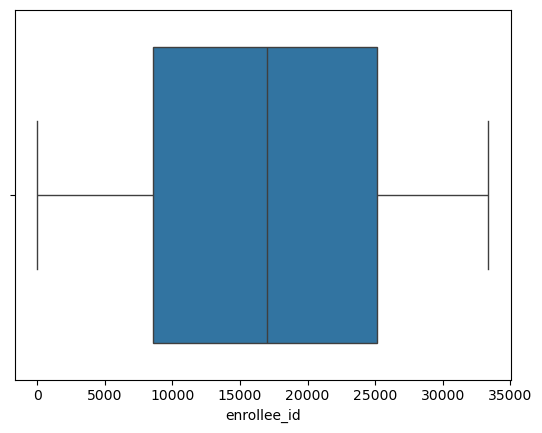

In [93]:
sns.boxplot(x="enrollee_id",data=sc)
plt.show()

In [95]:
# now using Z score method
dt=pd.read_csv("aug_train.csv")
dt.head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0


In [97]:
dt.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [103]:
z_score

0       -0.488972
1       -0.305817
2        0.293599
3       -0.222565
4       -0.955184
           ...   
19153   -0.389069
19154   -0.222565
19155   -0.355768
19156    0.526705
19157    1.026218
Name: training_hours, Length: 19158, dtype: float64

In [105]:
z_score>3

0        False
1        False
2        False
3        False
4        False
         ...  
19153    False
19154    False
19155    False
19156    False
19157    False
Name: training_hours, Length: 19158, dtype: bool

In [107]:
dt["z_score"]=z_score

In [109]:
dt

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,z_score
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,-0.488972
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,-0.305817
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,0.293599
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,-0.222565
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0,-0.955184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0,-0.389069
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0,-0.222565
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0,-0.355768
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0,0.526705


In [113]:
dt[dt["z_score"]<3]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,z_score
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,-0.488972
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,-0.305817
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,0.293599
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,-0.222565
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0,-0.955184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0,-0.389069
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0,-0.222565
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0,-0.355768
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0,0.526705


In [3]:
# Normalization Scaling
dt=pd.read_csv("aug_train.csv")
dt.head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0


In [5]:
dt.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
mi=MinMaxScaler()

In [11]:
mi.fit(dt[["training_hours"]])

MinMaxScaler()

In [25]:
dt["training_hours_MiMa"] = mi.transform(dt[["training_hours"]])

In [27]:

dt.head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,training_hours_MiMa
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,0.104478
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,0.137313
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,0.244776


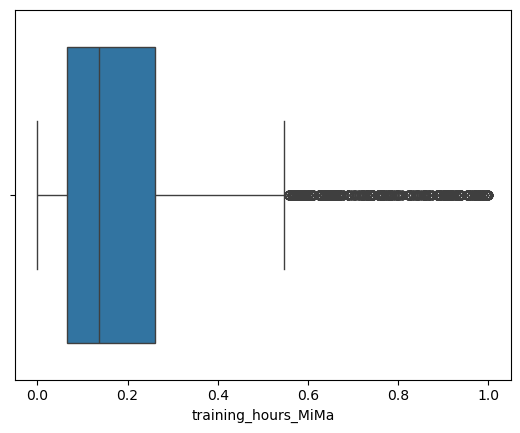

In [33]:
# plt.figure(figsize=10,5)
# plt.subplot(1,2,1)
# plt.title("updated")
sns.boxplot(x="training_hours_MiMa",data=dt)
plt.show()